## 8.5 サポートベクターマシンを使った分類
* SVM(Support Vector Machine)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 2次元の点を生成する
X = np.random.randn(200,2)
# 2値のラベル付け
y = X[:,0] + X[:,1] > 1

In [3]:
est = svm.LinearSVC()
est.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
xx, yy = np.meshgrid(np.linspace(-3,3,500),np.linspace(-3,3,500))
def plot_decision_function(est):
    Z = est.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    plt.imshow(Z,extent=(xx.min(),xx.max(),yy.min(),yy.max()),
               aspect='auto',origin='lower',cmap=cmap)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    plt.scatter(X[:,0],X[:,1],s=30,c=.5+.5*y,lw=1,cmap=cmap,vmin=0,vmax=1)
    plt.axhline(0, color='k', ls='--')
    plt.axvline(0, color='k', ls='--')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3,3,-3,3])

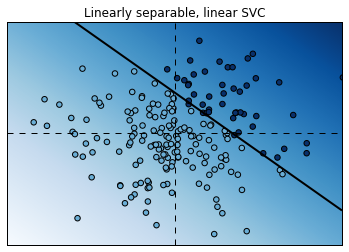

In [5]:
# 線形SVC
plot_decision_function(est)
plt.title("Linearly separable, linear SVC")

Score: 0.5


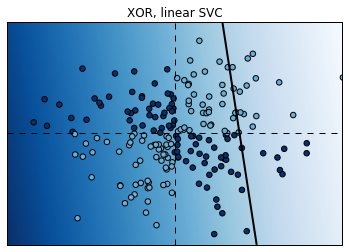

In [6]:
# XOR関数によるラベル付け
y = np.logical_xor(X[:,0]>0,X[:,1]>0)
est = gs.GridSearchCV(svm.LinearSVC(),{'C':np.logspace(-3.,3.,10)})
est.fit(X,y)
print("Score: {0:.1f}".format(cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est)
plt.title("XOR, linear SVC")

Score: 0.940


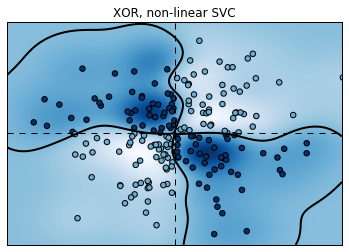

In [7]:
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
est = gs.GridSearchCV(svm.SVC(),{'C':np.logspace(-3.,3.,10),'gamma': np.logspace(-3.,3.,10)})
est.fit(X,y)
print("Score: {0:.3f}".format(cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est.best_estimator_)
plt.title("XOR, non-linear SVC")

## 参考文献

* 排他的論理和
 * https://ja.wikipedia.org/wiki/排他的論理和 
* サポートベクターマシン
 * https://ja.wikipedia.org/wiki/サポートベクターマシン
* カーネル法
 * https://ja.wikipedia.org/wiki/カーネル法
* scikit-learn SVMマニュアル
 * http://scikit-learn.org/stable/modules/svm.html
* カーネルトリックについての解説記事
 * http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html
* 非線形SVMの実行例
 * http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html